In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy import asarray
from pandas import read_excel
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
n = 24

/content/drive/MyDrive/Mas/data/I1.xlsx


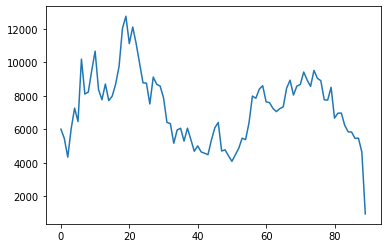

>expected=7754.4, predicted=8538.5
>expected=7736.5, predicted=8262.6
>expected=8501.8, predicted=7869.4
>expected=6662.3, predicted=8548.9
>expected=6958.6, predicted=7372.0
>expected=6960.8, predicted=7232.5
>expected=6224.4, predicted=7387.4
>expected=5845.6, predicted=5852.6
>expected=5826.9, predicted=5642.1
>expected=5451.6, predicted=5813.7
>expected=5466.7, predicted=5579.4
>expected=4629.5, predicted=5548.6
>expected=944.6, predicted=4734.8
MAE: 850.263
MedianAE: 526.160
MSE: 1679766.215
RMSE: 1296.058
SMAPE : 18.37%


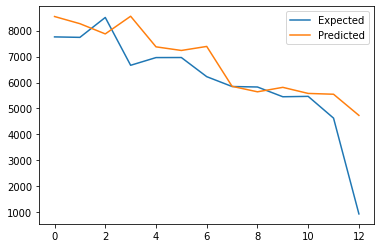

/content/drive/MyDrive/Mas/data/I2.xlsx


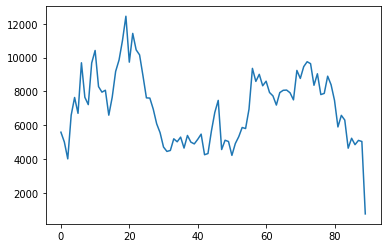

>expected=7879.2, predicted=7461.7
>expected=8899.4, predicted=7460.1
>expected=8390.6, predicted=8502.6
>expected=7467.6, predicted=8316.9
>expected=5893.2, predicted=8120.6
>expected=6579.6, predicted=6079.7
>expected=6301.5, predicted=7470.1
>expected=4635.4, predicted=6134.0
>expected=5222.8, predicted=4641.8
>expected=4843.1, predicted=4821.0
>expected=5096.4, predicted=4649.9
>expected=5032.8, predicted=4941.4
>expected=742.6, predicted=5157.6
MAE: 1059.116
MedianAE: 581.019
MSE: 2449202.367
RMSE: 1564.993
SMAPE : 22.5%


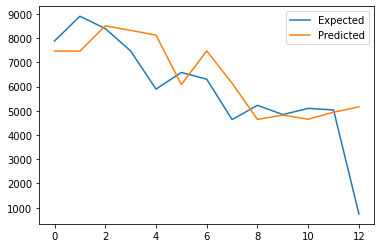

/content/drive/MyDrive/Mas/data/I3.xlsx


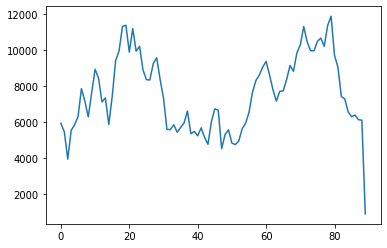

>expected=10220.8, predicted=9937.6
>expected=11382.5, predicted=10174.3
>expected=11897.9, predicted=10382.2
>expected=9725.4, predicted=10683.2
>expected=9057.9, predicted=10105.9
>expected=7425.6, predicted=8708.8
>expected=7289.2, predicted=7635.2
>expected=6565.6, predicted=6780.5
>expected=6298.8, predicted=7164.6
>expected=6388.5, predicted=7004.7
>expected=6133.3, predicted=6674.1
>expected=6104.0, predicted=6693.6
>expected=880.0, predicted=6381.0
MAE: 1151.559
MedianAE: 865.881
MSE: 3053436.392
RMSE: 1747.408
SMAPE : 20.23%


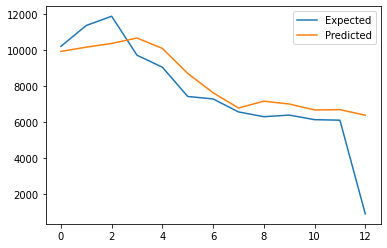

/content/drive/MyDrive/Mas/data/I4.xlsx


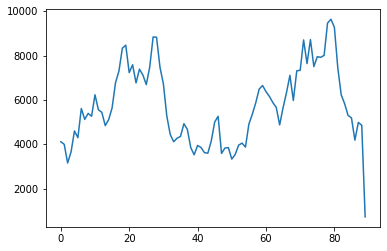

>expected=8007.0, predicted=7699.3
>expected=9462.0, predicted=7814.6
>expected=9635.2, predicted=8013.4
>expected=9273.0, predicted=8715.6
>expected=7441.3, predicted=8901.0
>expected=6225.4, predicted=7362.9
>expected=5827.6, predicted=6116.4
>expected=5304.1, predicted=5746.1
>expected=5187.4, predicted=4858.9
>expected=4185.3, predicted=5127.9
>expected=4982.5, predicted=4513.4
>expected=4856.6, predicted=5118.7
>expected=726.3, predicted=4920.2
MAE: 1050.637
MedianAE: 557.379
MSE: 2178909.187
RMSE: 1476.113
SMAPE : 21.96%


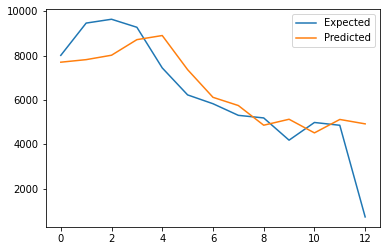

/content/drive/MyDrive/Mas/data/I5.xlsx


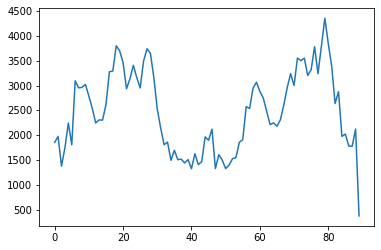

>expected=3239.1, predicted=3473.6
>expected=3796.4, predicted=3157.8
>expected=4357.6, predicted=3155.5
>expected=3849.2, predicted=3660.3
>expected=3395.1, predicted=3707.8
>expected=2638.8, predicted=3315.1
>expected=2879.4, predicted=2853.7
>expected=1975.7, predicted=3065.2
>expected=2023.3, predicted=1969.2
>expected=1781.4, predicted=1906.0
>expected=1777.7, predicted=1866.5
>expected=2124.4, predicted=1628.1
>expected=373.3, predicted=1866.0
MAE: 509.599
MedianAE: 312.738
MSE: 475935.206
RMSE: 689.881
SMAPE : 24.01%


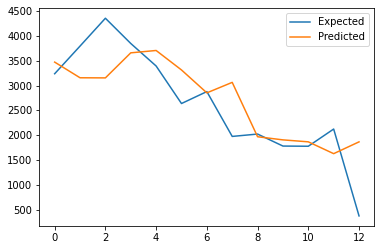

In [4]:
folder = r'/content/drive/MyDrive/Mas/data'
files = os.listdir(folder)
i=1
for file in files:
    if file.endswith('.xlsx'):
        
        Name = 'I'
        Combine = folder+'/'+Name+''+str(i)+'.xlsx'
        print(Combine)
        
        #path = "Sheets"+Combine 
        #print(path)
        df = pd.read_excel(Combine)
        x = df['Week']
        y = df['I']

        plt.plot(y)
        plt.show()
        
        def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
            n_vars = 1 if type(data) is list else data.shape[1]
            df = DataFrame(data)
            cols = list()
            # input sequence (t-n, ... t-1)
            for i  in range(n_in, 0, -1):
                cols.append(df.shift(i))
            # forecast sequence (t, t+1, ... t+n)
            for i in range(0, n_out):
                cols.append(df.shift(-i))
            # put it all together
            agg = concat(cols, axis=1)
            # drop rows with NaN values
            if dropnan:
                agg.dropna(inplace=True)
            return agg.values


        # split a univariate dataset into train/test sets
        def train_test_split(data, n_test, test_size=0.2,shuffle=False):
	        return data[:-n_test, :], data[-n_test:, :]


        # fit an random forest model and make a one step prediction
        def random_forest_forecast(train, testX):
            # transform list into array
            train = asarray(train)
            # split into input and output columns
            trainX, trainy = train[:, :-1], train[:, -1]
            # fit model
            model = RandomForestRegressor(n_estimators=1000)
            model.fit(trainX, trainy)
            # make a one-step prediction
            yhat = model.predict([testX])
            return yhat[0]

        # walk-forward validation for univariate data
        def walk_forward_validation(data, n_test):
            predictions = list()
            # split dataset
            train, test = train_test_split(data, n_test)
            # seed history with training dataset
            history = [x for x in train]
            # step over each time-step in the test set
            for i in range(len(test)):
                # split test row into input and output columns
                testX, testy = test[i, :-1], test[i, -1]
                # fit model on history and make a prediction
                yhat = random_forest_forecast(history, testX)
                # store forecast in list of predictions
                predictions.append(yhat)
                # add actual observation to history for the next loop
                history.append(test[i])
                # summarize progress
                print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
                def smape(a, f):
                    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
            # estimate prediction error
            error1 = mean_absolute_error(test[:, -1], predictions)
            error3 = median_absolute_error(test[:, -1], predictions)
            error4 = mean_squared_error(test[:, -1], predictions)
            error5 = sqrt(mean_squared_error(test[:, -1], predictions))
            error6 = smape(test[:, -1], predictions)
            return error1, error3, error4, error5,error6, test[:, -1], predictions
            
            

        # load the dataset
        #series = read_excel('I1_2021.xlsx', header=0, index_col=0)
        series = read_excel(Combine, header=0, index_col=0)
        values = series.iloc[:,0:1]
        # transform the time series data into supervised learning
        data = series_to_supervised(values, n_in=6)
        # evaluate
        mae,meae,mse,rmse,smape, y, yhat = walk_forward_validation(data, 13)
      
        print('MAE: %.3f' % mae)
        print('MedianAE: %.3f' % meae)
        print('MSE: %.3f' % mse)
        print('RMSE: %.3f' % rmse)
        print('SMAPE : '"{:.4}%".format(smape))
        
        # plot expected vs predicted
        pyplot.plot(y, label='Expected')
        pyplot.plot(yhat, label='Predicted')
        pyplot.legend()
        pyplot.show()


        i+=1
        
#i+1